In [1]:
%run "Common setup.ipynb"

In [2]:
from SALib.analyze.morris import analyze

In [3]:
numeric_samples = pd.read_csv(f'{DATA_DIR}moat_10_numeric_samples.csv', index_col=0)
numeric_vals = numeric_samples[perturbed_cols].values

In [4]:
def incremental_morris_analysis(lower, upper, step=1):
    res, idx = [], []
    for reps in range(lower, upper, step):

        results = analyze(CIM_SPEC, numeric_vals[:reps], 
                          np_res[:reps], 
                          seed=101)
        total = results.to_df()

        res.append(total.loc[tgt_param, ['mu_star', 'sigma']].tolist())
        idx.append(reps)
    # End for
    
    return res, idx
# End incremental_morris_analysis()

In [5]:
cols = ['$\mu*$', '$\sigma$']

# Coupling disabled
moat_10_no_irrigation_results = pd.read_csv(f'{DATA_DIR}moat_no_irrigation_10_results.csv', index_col=0)
moat_10_no_irrigation_results['Avg. $/ML'].fillna(moat_10_no_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

np_res = moat_10_no_irrigation_results.loc[:, tgt_metric].values

runs = np_res.shape[0]
res, idx = incremental_morris_analysis(54, runs+1, 54)

disabled = pd.DataFrame(data=res, columns=cols, index=idx)

C:\UserData\takuya\miniconda3\envs\oat-use\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\UserData\takuya\miniconda3\envs\oat-use\lib\site-packages\numpy\core\_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [6]:
# Coupling enabled

moat_10_with_irrigation_results = pd.read_csv(f'{DATA_DIR}moat_with_irrigation_10_results.csv', index_col=0)
moat_10_with_irrigation_results['Avg. $/ML'].fillna(moat_10_with_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

np_res = moat_10_with_irrigation_results.loc[:, tgt_metric].values

runs = np_res.shape[0]
res, idx = incremental_morris_analysis(54, runs+1, 54)
enabled = pd.DataFrame(data=res, columns=cols, index=idx)

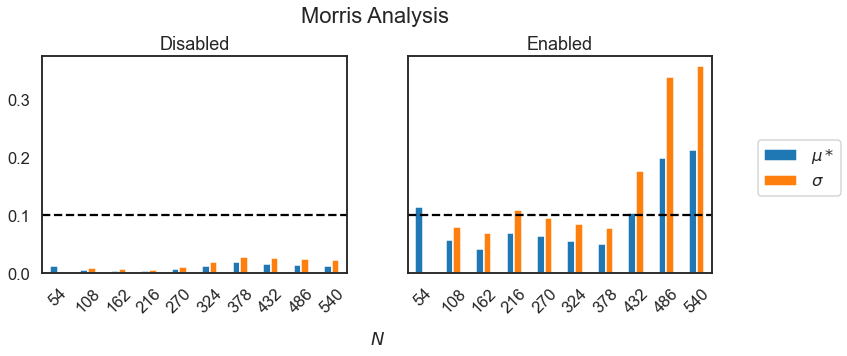

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)


disabled.loc[:, cols].plot(kind='bar', 
                           legend=None,
                           title='Disabled',
                           use_index=True,
                           ax=axes[0],
                           rot=45)

enabled.loc[:, cols].plot(kind='bar', 
                          legend=None,
                          title='Enabled',
                          use_index=True,
                          ax=axes[1],
                          rot=45).legend(
                             bbox_to_anchor=(1.45, 0.65)
                          )

axes[0].axhline(0.1, c='k', ls='--')
axes[1].axhline(0.1, c='k', ls='--')

fig.suptitle("Morris Analysis", x=0.51, y=1.05, fontsize=22)
plt.xlabel("$N$", x=-0.1, labelpad=15);

In [8]:
fig.savefig(f'{FIG_DIR}morris_oat_results.png', dpi=300, bbox_inches='tight')

---

Morris cannot be used with the full result set as it requires that Morris sampling scheme be used